<a href="https://colab.research.google.com/github/WatermelonGalaxy/deep-learning-colabs/blob/main/ADL_hw_CA_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

print(X_train.shape)
print(X_train[1])
print(y_train)

(11610, 8)
[ 5.32750000e+00  5.00000000e+00  6.49005964e+00  9.91053678e-01
  3.46400000e+03  3.44333996e+00  3.36900000e+01 -1.17390000e+02]
[1.442 1.687 1.621 ... 0.68  0.613 1.97 ]


Create a FUNCTIONAL model. Set:

- final layer
- loss
- optimizer
- metrics

See sample code at the bottom for:
- performance on X_test/y_test
- plot of train history


In [16]:
# model goes here
# Use Functional API; no Sequential models allowed.

tf.keras.backend.clear_session()
tf.random.set_seed(42)


#You might benefit from a simimlar first layer:
input_layer = tf.keras.layers.Input(shape=(8,))
# normalizezation layer
norm = tf.keras.layers.Normalization(axis=-1)(input_layer)
# Add a dense layer (with relu activation) connected to the input_layer
dense1 = tf.keras.layers.Dense(128, activation='relu')(norm)
# Add a dense layer (with relu activation) connected to the dense1 layer
dense2 = tf.keras.layers.Dense(64, activation='relu')(dense1)

# output layer
output_layer = tf.keras.layers.Dense(1)(dense2)

# Create a model using the input layer and output layer
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)





In [18]:
model.compile(optimizer='adam', loss='mse', metrics= ['accuracy']) # Your code here

number_of_epochs = 10 #change this!

history = model.fit(X_train, y_train, epochs=number_of_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
363/363 [==============================] - 1s 1ms/step - loss: 14.3597 - accuracy: 0.0028 - val_loss: 17.3544 - val_accuracy: 0.0013
Epoch 2/25
363/363 [==============================] - 0s 937us/step - loss: 1.9193 - accuracy: 0.0026 - val_loss: 0.7873 - val_accuracy: 0.0044
Epoch 3/25
363/363 [==============================] - 0s 940us/step - loss: 16.4655 - accuracy: 0.0028 - val_loss: 0.7385 - val_accuracy: 0.0044
Epoch 4/25
363/363 [==============================] - 0s 951us/step - loss: 3.5560 - accuracy: 0.0027 - val_loss: 1.9672 - val_accuracy: 0.0044
Epoch 5/25
363/363 [==============================] - 0s 970us/step - loss: 5.6498 - accuracy: 0.0026 - val_loss: 1.7722 - val_accuracy: 0.0044
Epoch 6/25
363/363 [==============================] - 0s 957us/step - loss: 46.8519 - accuracy: 0.0026 - val_loss: 0.7917 - val_accuracy: 0.0044
Epoch 7/25
363/363 [==============================] - 0s 930us/step - loss: 0.7720 - accuracy: 0.0029 - val_loss: 0.8577 - val_accurac

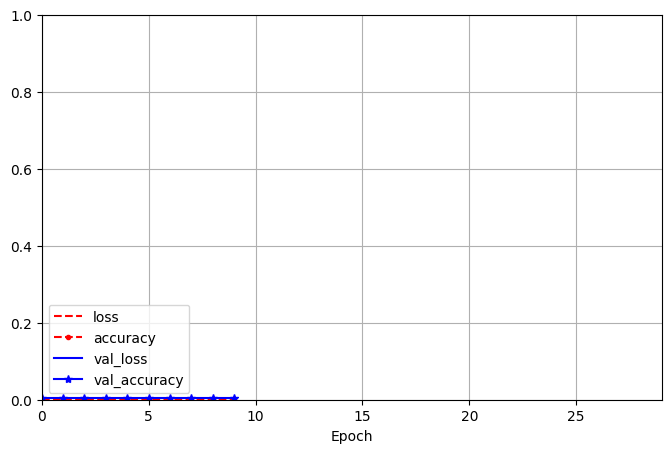

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [23]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 578us/step - loss: 2.4536


2.453583240509033